In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from statsmodels.stats.multitest import fdrcorrection
import patch_seq_spl.helper_functions as src
from importlib import reload
import json
import matplotlib.pyplot as plt
import seaborn as sns
from utility.ryp import r, to_r
import anndata
import dask.dataframe as dd

Loading required package: svglite


In [27]:
glm_results = dd.read_csv([path for path in Path("proc/quantas/beta_binomial").iterdir()], include_path_column = True)\
    .pivot_table(index = "event_name", columns = "path", values = "p_value").compute()

glm_results.rename(columns = {path: Path(path).stem for path in glm_results.columns}, inplace = True)

glm_results = glm_results.loc[glm_results.isna().sum(axis = 1) < 2]

glm_results.fillna(1, inplace = True)

event_name_gene_name = pd.read_csv("data/quantas/Mm.seq.all.AS.chrom.can.id2gene2symbol", sep = "\t", header = None)\
        .set_index(0)\
        .loc[:, 2]\
        .to_dict()        
glm_results["gene_name"] = glm_results.index.map(event_name_gene_name)
glm_results["gene_name"] = glm_results.groupby("gene_name").cumcount().add(1).astype(str).radd(glm_results["gene_name"] + '_')
glm_results = glm_results.set_index("gene_name")

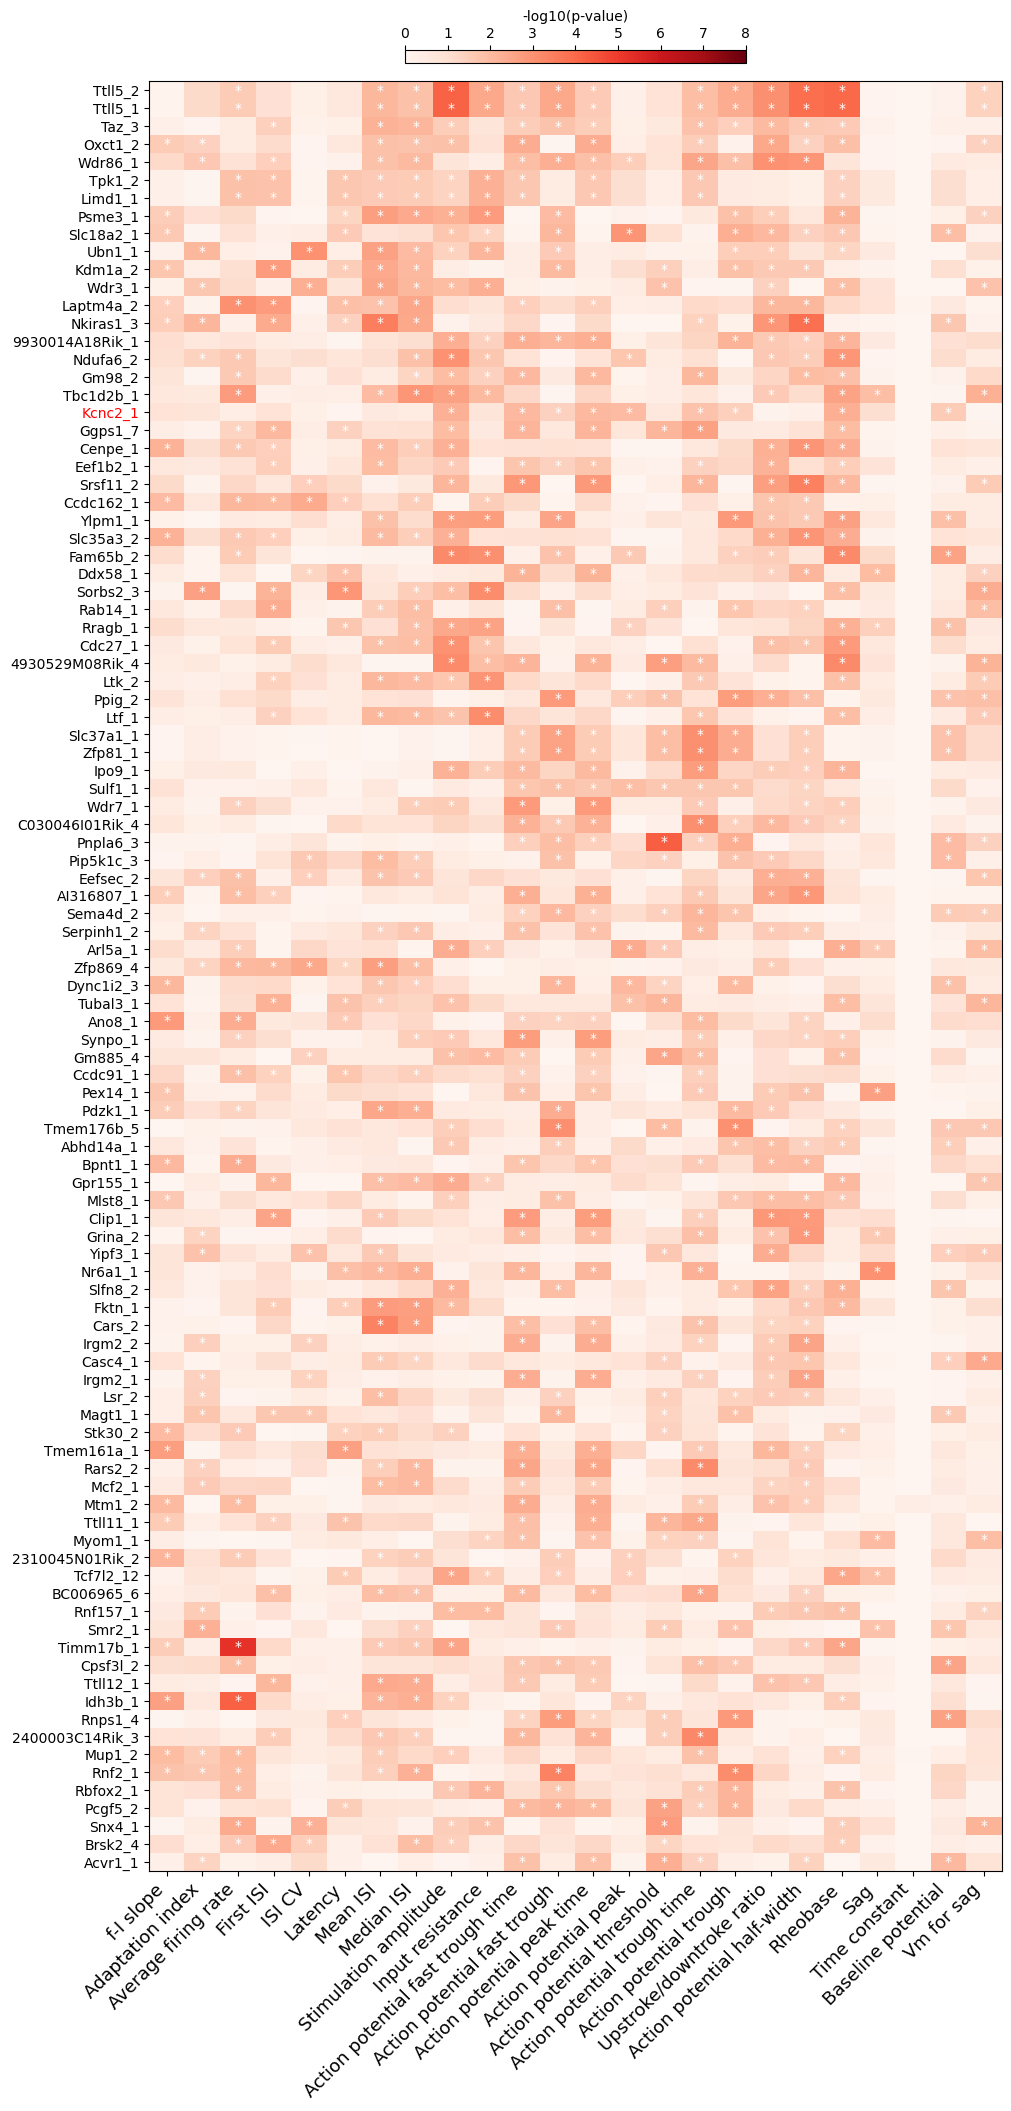

In [28]:
src.plot_glm_results(glm_results, vmin = 0, vmax = 8)